In [9]:
import pickle
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from random import shuffle, randint

In [17]:
# 3.1

with open("data.pickle", "rb") as f:
    dataset = pickle.load(f)

x_test, y_test = dataset["test"][:, 0], dataset["test"][:, 1]

x_trains = [[] for _ in range(15)]
y_trains = [[] for _ in range(15)]

for x, y in dataset["train"]:
    i = 0
    while len(x_trains[i]) >= 500:
        i = randint(0, 14)
    x_trains[i].append(x)
    y_trains[i].append(y)
    
x_trains = np.array([np.array(x) for x in x_trains])
y_trains = np.array([np.array(y) for y in y_trains])

# shuffle(dataset["train"])
# x_train_big = dataset["train"][:, 0]
# y_train_big = dataset["train"][:, 1]
# x_trains = np.array([x_train_big[i : i + x_train_big.size // 15] for i in range(15)])
# y_trains = np.array([y_train_big[i : i + y_train_big.size // 15] for i in range(15)])

In [19]:
# 3.2

averages = {}
for degree in range(1, 11):
    polynomial = PolynomialFeatures(degree)
    res = []

    for x_train, y_train in zip(x_trains, y_trains):
        model = LinearRegression()
        model.fit(polynomial.fit_transform(x_train.reshape(-1, 1)), y_train)
        res.append(model.predict(polynomial.fit_transform(x_test.reshape(-1, 1))))

    variance = np.var(res, axis=0)
    square = np.vectorize(lambda x: x**2)
    bias = y_test - np.mean(res, axis=0)
    bias_square = square(bias)
    mse = np.mean(square([y_test - y_pred for y_pred in res]), axis=0)

    averages[degree] = {
        "bias": np.mean(bias),
        "bias_square": np.mean(bias_square),
        "variance": np.mean(variance),
        "mse": np.mean(mse),
    }

    print(degree, averages[degree])

1 {'bias': 0.2348950581196144, 'bias_square': 1.0056529299580075, 'variance': 0.040383184050351364, 'mse': 1.0460361140083592}
2 {'bias': 0.22777052306011686, 'bias_square': 0.9488534301457427, 'variance': 0.06555692228766119, 'mse': 1.0144103524334036}
3 {'bias': -0.01673441541641696, 'bias_square': 0.01448267047015755, 'variance': 0.10833395495105291, 'mse': 0.12281662542121045}
4 {'bias': -0.006987791203755656, 'bias_square': 0.013932268143883902, 'variance': 0.13270563326331075, 'mse': 0.14663790140719463}
5 {'bias': -0.0022852297941181377, 'bias_square': 0.013426839106830934, 'variance': 0.19756268240527056, 'mse': 0.21098952151210143}
6 {'bias': -0.0016245279483470653, 'bias_square': 0.013022189360444674, 'variance': 0.23463214347379044, 'mse': 0.24765433283423524}
7 {'bias': -0.002266521268971533, 'bias_square': 0.014106139817025947, 'variance': 0.25643662932758343, 'mse': 0.27054276914460945}
8 {'bias': 0.016409699062841576, 'bias_square': 0.026449352647181058, 'variance': 0.24

In [20]:
# 4

for degree, average in averages.items():
    irreducible_error = average["mse"] - average["variance"] - average["bias_square"]
    print(degree, round(irreducible_error, 5))

1 0.0
2 -0.0
3 -0.0
4 -0.0
5 -0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0


<Axes: >

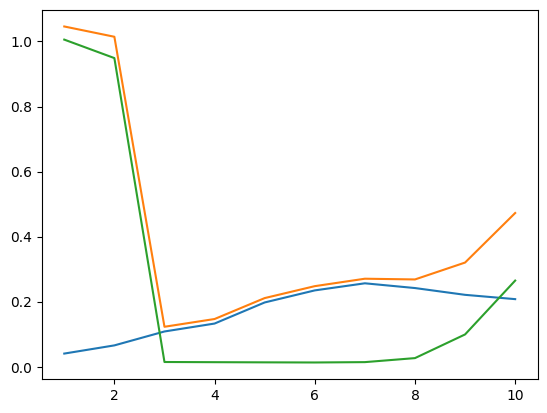

In [23]:
sns.lineplot(x=range(1,11), y=map(lambda x:x["variance"], averages.values()))
sns.lineplot(x=range(1,11), y=map(lambda x:x["mse"], averages.values()))
sns.lineplot(x=range(1,11), y=map(lambda x:x["bias_square"], averages.values()))